<a href="https://colab.research.google.com/github/Aleena-Mishra-10/Deep-Learning/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [0]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d zalando-research/fashionmnist

 87% 60.0M/68.8M [00:01<00:00, 39.7MB/s]
100% 68.8M/68.8M [00:01<00:00, 47.5MB/s]


In [0]:
from zipfile import ZipFile
file_name="fashionmnist.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import struct
import numpy as np

def read_idx(filename):
    """Credit: https://gist.github.com/tylerneylon"""
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [0]:
x_train = read_idx("/content/train-images-idx3-ubyte")
y_train = read_idx("/content/train-labels-idx1-ubyte")
x_test = read_idx("/content/t10k-images-idx3-ubyte")
y_test = read_idx("/content/t10k-labels-idx1-ubyte")

In [0]:
print("initial shape or dimention of x_train",str(x_train.shape))
print("Number of samples in our training data",str(len(x_train)))
print("Number of labels in our training data",str(len(y_train)))
print("Number of samples in our test data",str(len(x_test)))
print("Number of labels in our test data",str(len(y_test)))
print("Dimensions of x_train",str(x_train[0].shape))
print("Labels in x_train",str(y_train.shape))
print("Dimensions of x_test",str(x_test[0].shape))
print("Labels in x_test",str(y_test.shape))

initial shape or dimention of x_train (60000, 28, 28)
Number of samples in our training data 60000
Number of labels in our training data 60000
Number of samples in our test data 10000
Number of labels in our test data 10000
Dimensions of x_train (28, 28)
Labels in x_train (60000,)
Dimensions of x_test (28, 28)
Labels in x_test (10000,)


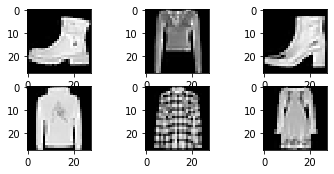

In [0]:
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils 
import keras 
from keras.models import Sequential 
from keras.layers import Dense , Dropout ,Flatten
from keras.layers import Conv2D , MaxPool2D, BatchNormalization 
from keras import backend as k

In [0]:
# Training Parameters
batch_size = 128
epochs = 1

In [0]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [0]:
# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [0]:
# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))


Number of Classes: 10


In [0]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]


In [0]:
# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0 

In [0]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 15s 246us/step - loss: 0.4428 - acc: 0.8481 - val_loss: 0.2939 - val_acc: 0.8932
Test loss: 0.2939441557407379
Test accuracy: 0.8932


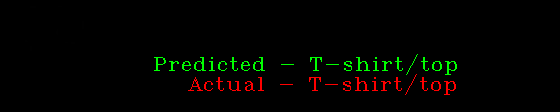

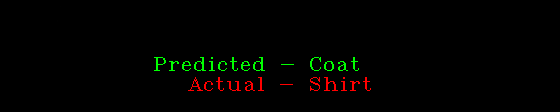

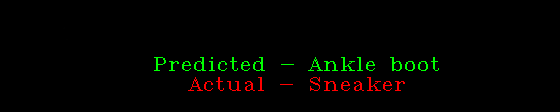

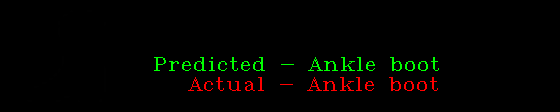

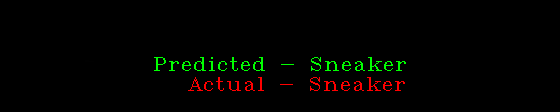

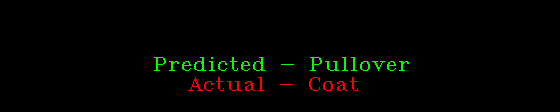

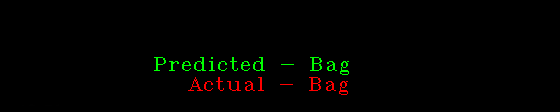

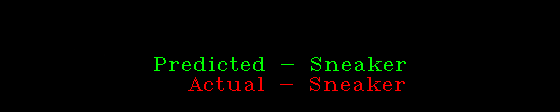

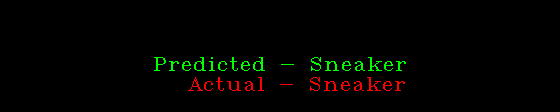

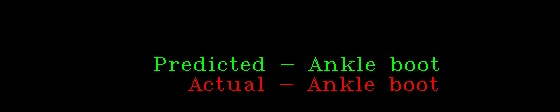

In [0]:
import cv2
import numpy as np

def getLabel(input_class):
    number = int(input_class)
    if number == 0:
        return "T-shirt/top "
    if number == 1:
        return "Trouser"
    if number == 2:
        return "Pullover"
    if number == 3:
        return "Dress"
    if number == 4:
        return "Coat"
    if number == 5:
        return "Sandal"
    if number == 6:
        return "Shirt"
    if number == 7:
        return "Sneaker"
    if number == 8:
        return "Bag"
    if number == 9:
        return "Ankle boot"

def draw_test(name, pred, actual, input_im):
    BLACK = [0,0,0]

    res = getLabel(pred)
    actual = getLabel(actual)   
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, 4*imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, "Predicted - " + str(res), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,255,0), 1)
    cv2.putText(expanded_image, "   Actual - " + str(actual), (152, 90) , cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (0,0,255), 1)
    cv2_imshow(expanded_image)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    actual = y_test[rand].argmax(axis=0)
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, actual, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)